In [1]:
import pandas as pd
import numpy as np
import os
import sys
import argparse
import logging
import json
import re

data = pd.read_csv('bestsellers_with_categories.csv', encoding='utf-8')
import matplotlib.pyplot as plt

data.head
data.columns
data.info()

# print top 10 values 
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


Missing values in each column:
Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


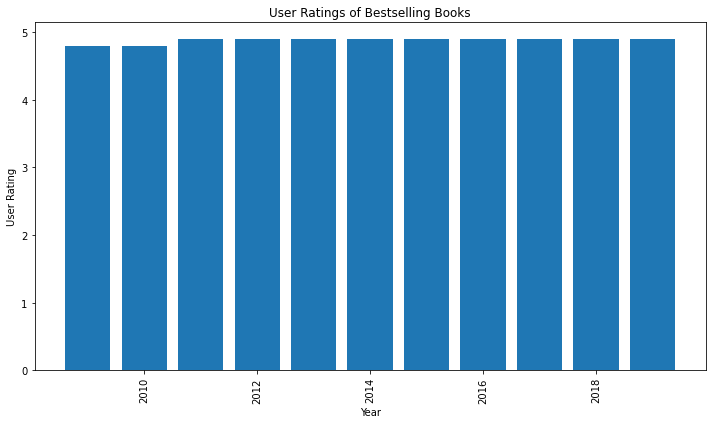

In [2]:
# check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)
# create graph to understand the data
def plot_graph(data):
    plt.figure(figsize=(10, 6))
    plt.bar(data['Year'], data['User Rating'])
    plt.xlabel('Year')
    plt.ylabel('User Rating')
    plt.title('User Ratings of Bestselling Books')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


# print graph
def print_graph():
    plt.figure(figsize=(10, 6))
    plt.bar(data['Year'], data['User Rating'])
    plt.xlabel('Year')
    plt.ylabel('User Rating')
    plt.title('User Ratings of Bestselling Books')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


# call print graph
print_graph()

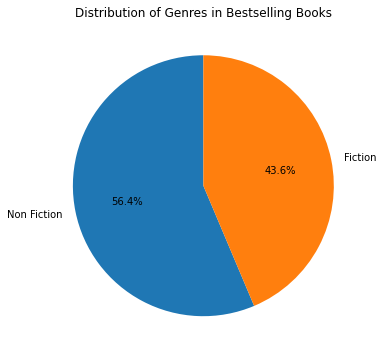

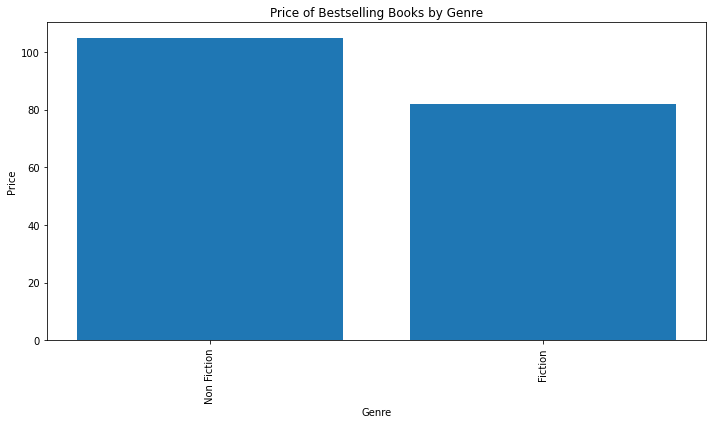

In [3]:
# create a pie chart on price and genre 
def plot_pie_chart(data):
    plt.figure(figsize=(10, 6))
    data['Genre'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of Genres in Bestselling Books')
    plt.ylabel('')
    plt.show()

# call plot pie chart
plot_pie_chart(data)




# create a bar graph on price and genre

def plot_genre_price(data):
    plt.figure(figsize=(10, 6))
    plt.bar(data['Genre'], data['Price'])
    plt.xlabel('Genre')
    plt.ylabel('Price')
    plt.title('Price of Bestselling Books by Genre')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# call plot_genre_price
plot_genre_price(data)

based on the above chart we can see and explain that more books are sold on non fiction than fiction 

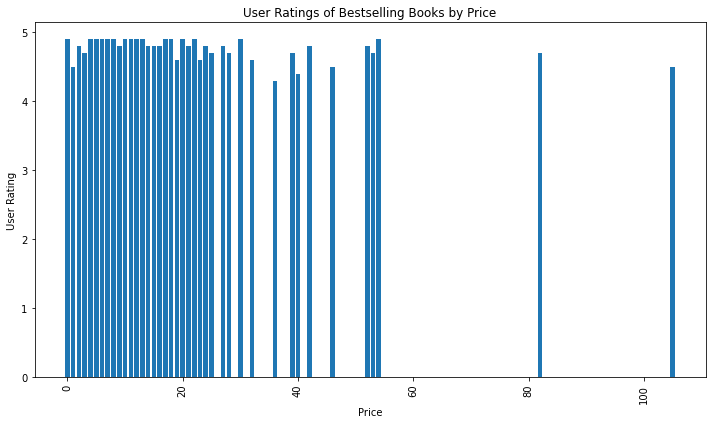

In [4]:
# create a graph on price and user rating
def plot_price_user_rating(data):
    plt.figure(figsize=(10, 6))
    plt.bar(data['Price'], data['User Rating'])
    plt.xlabel('Price')
    plt.ylabel('User Rating')
    plt.title('User Ratings of Bestselling Books by Price')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# call plot_price_user_rating
plot_price_user_rating(data)

In [5]:
# create a new  neural network model to predict the user rating based on the price and genre
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

# create a function to preprocess the data
def preprocess_data(data):
    # Drop rows with missing values
    data = data.dropna()

    # Convert 'User Rating' to numeric
    data['User Rating'] = pd.to_numeric(data['User Rating'], errors='coerce')

    # Drop rows with missing 'User Rating'
    data = data.dropna(subset=['User Rating'])

    # define label encoder
    # Convert 'Genre' to categorical
    data['Genre'] = data['Genre'].astype('category')
    # Convert 'Year' to datetime
    data['Year'] = pd.to_datetime(data['Year'], format='%Y', errors='coerce')
    # Drop rows with missing 'Year'
    data = data.dropna(subset=['Year'])
    # Convert 'Year' to numeric
    data['Year'] = data['Year'].dt.year
    # Drop rows with missing 'Year'
    data = data.dropna(subset=['Year'])
    # Convert 'Price' to numeric
    data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
    # Drop rows with missing 'Price'
    data = data.dropna(subset=['Price'])

    # Encode categorical variables
    label_encoder = LabelEncoder()
    data['Genre'] = label_encoder.fit_transform(data['Genre'])

    return data

# preprocess the data
data = preprocess_data(data)
# Split the data into features and target variable
X = data[['Price', 'Genre']]
y = data['User Rating']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a pipeline for preprocessing and model training
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), ['Price']),
        ('cat', OneHotEncoder(), ['Genre'])
    ])),
    ('model', MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
])
# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
# Save the model
import joblib
joblib.dump(pipeline, 'bestseller_model.pkl')

# Load the model
loaded_model = joblib.load('bestseller_model.pkl')

# Make predictions with the loaded model
sample_data = pd.DataFrame({'Price': [10.99, 15.99], 'Genre': ['Fiction', 'Non-Fiction']})
sample_data['Genre'] = label_encoder.transform(sample_data['Genre']) # need to fix this issue
predictions = loaded_model.predict(sample_data)
print(predictions)

# create a function to predict the user rating based on the price and genre
def predict_user_rating(price, genre):
    # Load the model
    loaded_model = joblib.load('bestseller_model.pkl')
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({'Price': [price], 'Genre': [genre]})
    # Encode the genre
    input_data['Genre'] = label_encoder.transform(input_data['Genre'])
    # Make predictions
    prediction = loaded_model.predict(input_data)
    return prediction[0]

# Test the function
predicted_rating = predict_user_rating(10.99, 'Fiction')
print(f'Predicted User Rating for a Fiction book priced at $10.99: {predicted_rating}')

# file with error need to update


Mean Squared Error: 0.071474613329341
R^2 Score: -0.24581218854080378


NameError: name 'label_encoder' is not defined

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib
import pandas as pd
import numpy as np

# Update the preprocess_data function to return the fitted LabelEncoder
def preprocess_data(data):
    # Drop rows with missing values
    data = data.dropna()

    # Convert 'User Rating' to numeric
    data['User Rating'] = pd.to_numeric(data['User Rating'], errors='coerce')

    # Drop rows with missing 'User Rating'
    data = data.dropna(subset=['User Rating'])

    # Convert 'Genre' to categorical
    data['Genre'] = data['Genre'].astype('category')

    # Convert 'Year' to datetime
    data['Year'] = pd.to_datetime(data['Year'], format='%Y', errors='coerce')
    data = data.dropna(subset=['Year'])
    data['Year'] = data['Year'].dt.year

    # Convert 'Price' to numeric
    data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
    data = data.dropna(subset=['Price'])

    # Encode categorical variables
    label_encoder = LabelEncoder()
    data['Genre'] = label_encoder.fit_transform(data['Genre'])

    # Save the categories for future use
    label_encoder.classes_ = np.append(label_encoder.classes_, ['Fiction', 'Non-Fiction'])  # Ensure all possible genres are included

    return data, label_encoder

# Preprocess the data and get the fitted LabelEncoder
data = pd.read_csv('bestsellers_with_categories.csv', encoding='utf-8')
data, label_encoder = preprocess_data(data)

# Split the data into features and target variable
X = data[['Price', 'Genre']]
y = data['User Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for preprocessing and model training
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), ['Price']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre'])  # Handle unknown categories
    ])),
    ('model', MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Save the model and the LabelEncoder
joblib.dump(pipeline, 'bestseller_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

# Load the model and LabelEncoder
loaded_model = joblib.load('bestseller_model.pkl')
loaded_label_encoder = joblib.load('label_encoder.pkl')

# Make predictions with the loaded model
sample_data = pd.DataFrame({'Price': [10.99, 15.99], 'Genre': ['Fiction', 'Non-Fiction']})
sample_data['Genre'] = loaded_label_encoder.transform(sample_data['Genre'])  # Use the loaded LabelEncoder
predictions = loaded_model.predict(sample_data)
print(predictions)

# Create a function to predict the user rating based on the price and genre
def predict_user_rating(price, genre):
    # Load the model and LabelEncoder
    loaded_model = joblib.load('bestseller_model.pkl')
    loaded_label_encoder = joblib.load('label_encoder.pkl')

    # Create a DataFrame for the input data
    input_data = pd.DataFrame({'Price': [price], 'Genre': [genre]})

    # Encode the genre
    try:
        input_data['Genre'] = loaded_label_encoder.transform(input_data['Genre'])
    except ValueError:
        raise ValueError(f"The genre '{genre}' is not recognized. Please use one of the following: {list(loaded_label_encoder.classes_)}")

    # Make predictions
    prediction = loaded_model.predict(input_data)
    return prediction[0]

# Test the function
predicted_rating = predict_user_rating(10.99, 'Fiction')
print(f'Predicted User Rating for a Fiction book priced at $10.99: {predicted_rating}')

Mean Squared Error: 0.071474613329341
R^2 Score: -0.24581218854080378
[2.61032403 2.51951039]
Predicted User Rating for a Fiction book priced at $10.99: 2.6103240317342142


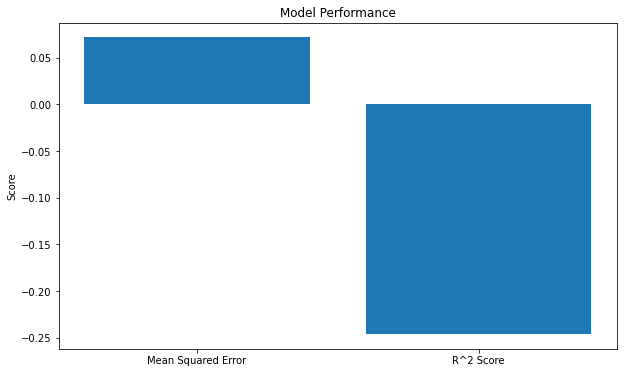

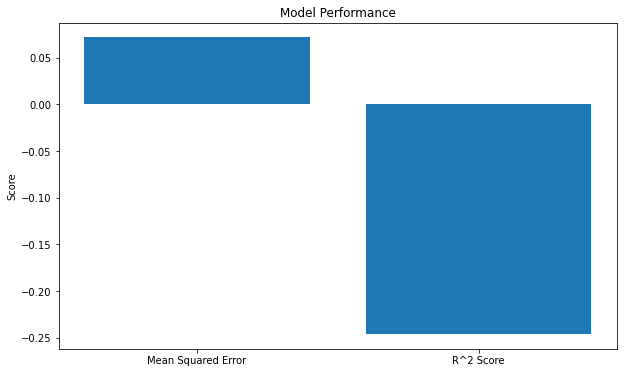

In [8]:
# create a graph  on the model performance
def plot_model_performance(mse, r2):
    plt.figure(figsize=(10, 6))
    plt.bar(['Mean Squared Error', 'R^2 Score'], [mse, r2])
    plt.ylabel('Score')
    plt.title('Model Performance')
    plt.show()
# call plot_model_performance
plot_model_performance(mse, r2)
# create a function to save the model
def save_model(model, filename):
    joblib.dump(model, filename)
    print(f"Model saved to {filename}")


# create a chart for rsquare and mae model 

def plot_model_performance(mse, r2):
    plt.figure(figsize=(10, 6))
    plt.bar(['Mean Squared Error', 'R^2 Score'], [mse, r2])
    plt.ylabel('Score')
    plt.title('Model Performance')
    plt.show()
# call plot_model_performance
plot_model_performance(mse, r2)
# create a function to save the model
def save_model(model, filename):
    joblib.dump(model, filename)
    print(f"Model saved to {filename}")